In [2]:
library(tibble);library(dplyr);library(ggplot2);library(readr)
library(scales); library(grid); library(RColorBrewer);library(png);library(ggthemes)

In [3]:
fte_theme <- function() {
      
    # Generate the colors for the chart procedurally with RColorBrewer
    palette <- brewer.pal("Greys", n=9)
    color.background = palette[1]
    color.grid.major = palette[3]
    color.grid.minor = palette[2]
    color.axis.text = palette[6]
    color.axis.title = palette[7]
    color.title = palette[9]

    # Begin construction of chart
    theme_bw(base_size=9) +

    # Set the entire chart region to a light gray color
    theme(panel.background=element_rect(fill=color.background, color=color.background)) +
    theme(plot.background=element_rect(fill=color.background, color=color.background)) +
    theme(panel.border=element_rect(color=color.background)) +

    # Format the grid
    theme(panel.grid.major=element_line(color=color.grid.major,size=.25)) +
    theme(panel.grid.minor=element_blank()) +
    theme(axis.ticks=element_blank()) +

    # Format the legend, but hide by default
    theme(legend.position="bottom") +
    theme(legend.background = element_rect(fill=color.background)) +
    theme(legend.text = element_text(size=7,color=color.axis.title)) +

    # Set title and axis labels, and format these and tick marks
    theme(plot.title=element_text(color=color.title, size=10, vjust=1.25)) +
    theme(axis.text.x=element_text(size=7,color=color.axis.text)) +
    theme(axis.text.y=element_text(size=7,color=color.axis.text)) +
    theme(axis.title.x=element_text(size=8,color=color.axis.title, vjust=0)) +
    theme(axis.title.y=element_text(size=8,color=color.axis.title, vjust=1.25)) +
    
    # Set facet attributes
    theme(strip.background = element_rect(fill=color.background, colour = color.background)) +
    theme(strip.text = element_text(size = 15, colour = color.axis.text)) +

    # Plot margins
    theme(plot.margin = unit(c(0.35, 0.2, 0.3, 0.35), "cm"))
    
}

In [4]:
df <- read_csv('Data/neander_total.csv')
tb <- as_tibble(df)

In [5]:
tb <- rename(tb, cramers_v = `cramer's v` ,  low_ci = l.ci,  up_ci = u.ci, chi_square = `chi square`)


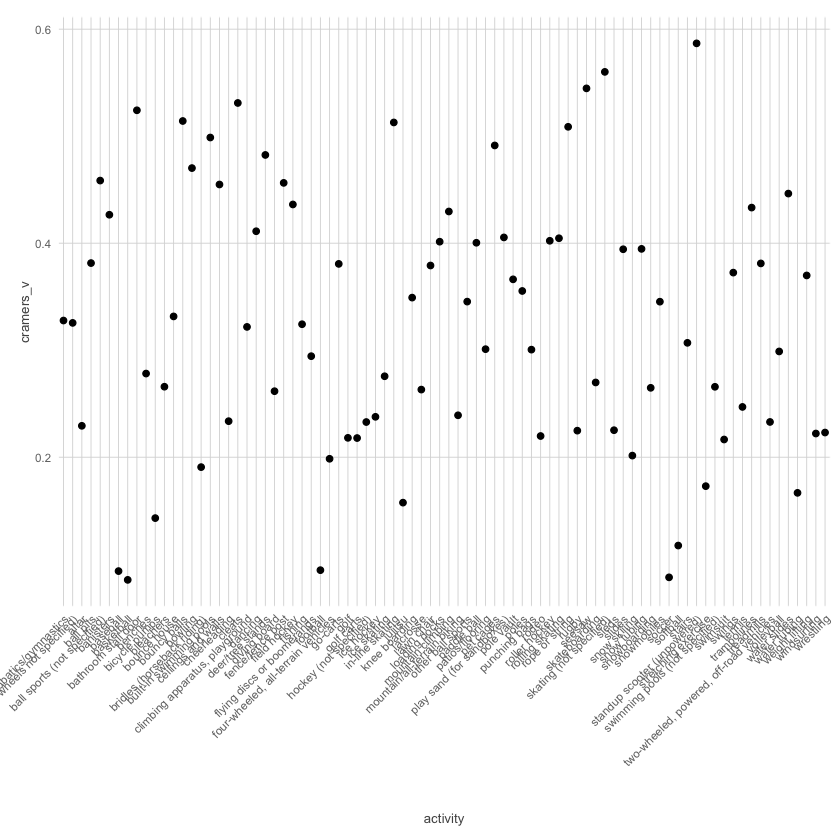

In [6]:
tb%>%
    arrange(cramers_v) %>%
    ggplot(aes(x = activity, y = cramers_v)) + geom_point() + fte_theme() +   theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [7]:
img <- readPNG("images/neander_tubing.png")
g <- rasterGrob(img, interpolate=TRUE)

,activity,cramers_v,low_ci,up_ci,chi_square,p-value
1,water tubing,0.166706244,0,0.191163542,2.973633992,0.812148701
2,swimsuit,0.216559228,0,0.282435723,7.17537859,0.304932516
3,golf carts,0.217917597,0,0.282950127,9.97249664,0.125815034
4,golf,0.218105345,0,0.281538417,11.74977561,0.067789542
5,windsurfing,0.222147531,0,0.285967341,12.53477947,0.051048172
6,altar,0.22934763,0,0.27958633,3.576822816,0.733722288
7,diving board,0.261694057,0,0.34134938,7.396248196,0.285750714
8,bleachers,0.265893759,0,0.344154559,10.95842113,0.089670009
9,benches,0.278182553,0,0.362166153,8.976721833,0.174891457
10,flying discs or boomerangs,0.294419248,0,0.380575849,11.35543283,0.077993203


Saving 7 x 7 in image


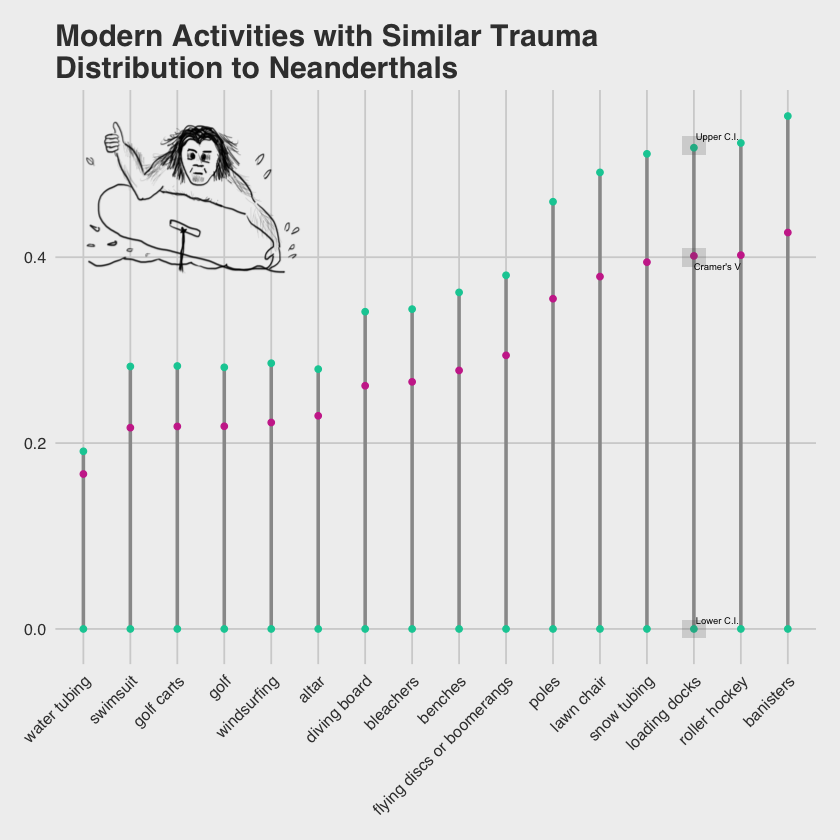

In [18]:
lower <-
tb%>%
filter(`p-value` >= .05) %>%
arrange(cramers_v)

lower
lower$activity <- factor(lower$activity, levels = lower$activity[order(lower$cramers_v)])

lower %>%
ggplot(aes(x = activity))+ 
#annotation_custom(g, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) + # add a photo
annotation_custom(g, xmin=-1, xmax=8, ymin=.2, ymax=.7) +
geom_segment(aes(x = activity,y = lower$low_ci,xend = activity,yend = lower$up_ci),size = 1, colour = "#999999")+
geom_point(aes(y = cramers_v), colour = "#cc3399") +
geom_point(aes(y = low_ci), colour = "#00cca3") +
geom_point(aes(y = up_ci), colour = "#00cca3") +
theme_fivethirtyeight() +   theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
labs(title = "Modern Activities with Similar Trauma \nDistribution to Neanderthals", y = "Cramer's V") +
annotate("rect", xmin = 13.75, xmax = 14.25, ymin = .51, ymax = .53,alpha = .2) +
annotate("rect", xmin = 13.75, xmax = 14.25, ymin = -.01, ymax = .01,alpha = .2) +
annotate("rect", xmin = 13.75, xmax = 14.25, ymin = .39, ymax = .41,alpha = .2) +
annotate("text", x = 14.5, y = .39, label = "Cramer's V", size = 2) + 
annotate("text", x = 14.5, y = .01, label = "Lower C.I.", size = 2) +
annotate("text", x = 14.5, y = .53, label = "Upper C.I.", size = 2)

#ggsave('images/plots/neader_plot_538.png')

  #geom_point(aes(y = up_ci), colour = "red"))
#lower %>%
#ggplot(aes(x = activity)) +  
 # geom_point(aes(y = cramers_v), colour = "blue") + 
  #geom_point(aes(y = low_ci), colour = "red") +
  #geom_point(aes(y = up_ci), colour = "red") +
  #geom_segment(aes(x = activity,y = tb$low_ci,xend = activity,yend = tb$up_ci),size = 1)+
  #fte_theme() +   theme(axis.text.x = element_text(angle = 45, hjust = 1))

,activity,cramers_v,low_ci,up_ci,chi_square,p-value
1,"four-wheeled, all-terrain vehicles",0.198536657,0.07971965,0.250764995,18.09231306,0.006005594
2,rugby,0.224829267,0.091583112,0.283789553,18.29844809,0.005528076
3,sleds,0.225252731,0.079944248,0.285844878,16.642324,0.010691666
4,mountain/all-terrain biking,0.239191964,0.034517309,0.307227183,13.15894302,0.040580218
5,swimming pools (not specified),0.265799574,0.042158327,0.3412514,13.28208972,0.038768748
6,patios/flooring,0.300971689,0.095130187,0.383189287,15.67102461,0.015632972
7,all-terrain vehicles (number of wheels not specified),0.325535388,0.117945096,0.412821269,16.84975293,0.009851578
8,snowmobiles,0.345345353,0.121761988,0.438341618,16.57761438,0.010967589
9,knee boarding,0.349149037,0.096745231,0.445747625,14.87241608,0.021272583
10,go-carts,0.380663872,0.14987089,0.48120829,17.82331294,0.006689253


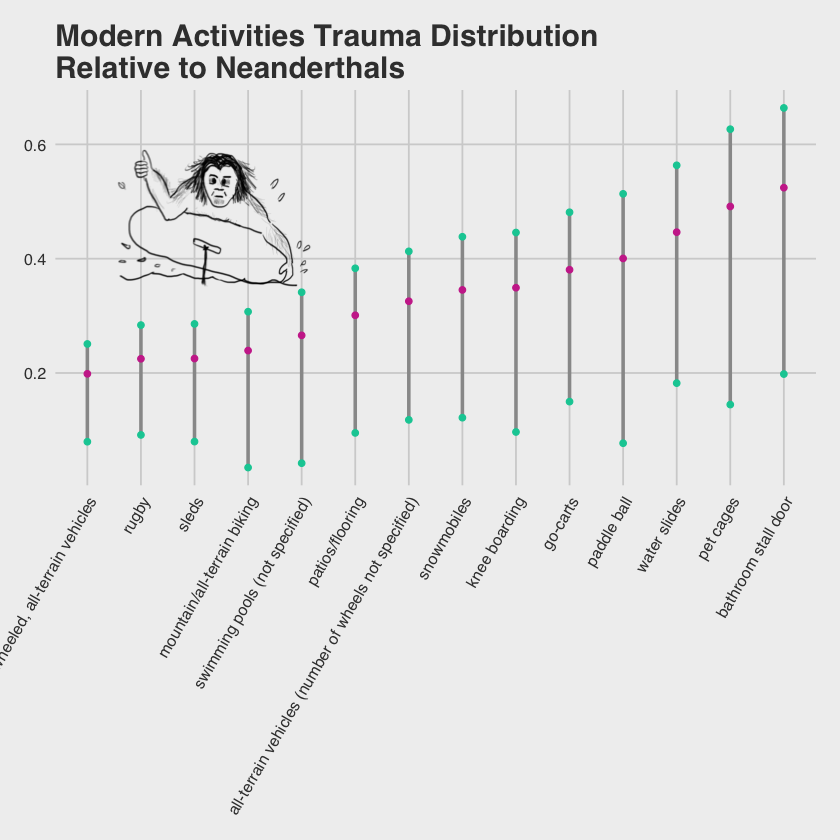

In [31]:
middle <-
tb%>%
filter(`p-value` <.05 & `p-value` >= .005) %>%
arrange(cramers_v)

middle
middle$activity <- factor(middle$activity, levels = middle$activity[order(middle$cramers_v)])

middle %>%
ggplot(aes(x = activity))+ 
#annotation_custom(g, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) + # add a photo
annotation_custom(g, xmin=-1, xmax=8, ymin=.2, ymax=.7) +
geom_segment(aes(x = activity,y = middle$low_ci,xend = activity,yend = middle$up_ci),size = 1, colour = "#999999")+
geom_point(aes(y = cramers_v), colour = "#cc3399") +
geom_point(aes(y = low_ci), colour = "#00cca3") +
geom_point(aes(y = up_ci), colour = "#00cca3") +
theme_fivethirtyeight() +   theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
labs(title = "Modern Activities Trauma Distribution \nRelative to Neanderthals", y = "Cramer's V") #+
#annotate("rect", xmin = 13.75, xmax = 14.25, ymin = .51, ymax = .53,alpha = .2) +
#annotate("rect", xmin = 13.75, xmax = 14.25, ymin = -.01, ymax = .01,alpha = .2) +
#annotate("rect", xmin = 13.75, xmax = 14.25, ymin = .39, ymax = .41,alpha = .2) +
#annotate("text", x = 14.5, y = .39, label = "Cramer's V", size = 2) + 
#annotate("text", x = 14.5, y = .01, label = "Lower C.I.", size = 2) +
#annotate("text", x = 14.5, y = .53, label = "Upper C.I.", size = 2)